# **선형회귀란?**
- 회귀 분석을 바탕으로 한 머신러닝 알고리즘
- 여러 개의 독립 변수와 대량의 데이터를 주로 다룬다
- 변수 간 상관관계를 바탕으로 특정한 수치를 예측하는 것을 목적으로 한다.
- 선형회귀 모델로 새로운 x값에 대한 y값을 예측한다
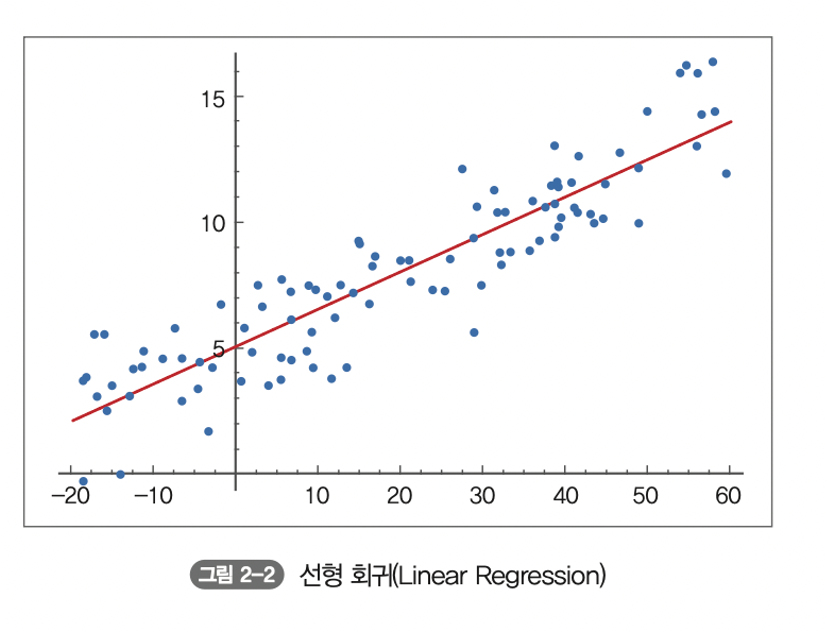


# 2. 전복(abalone) 순살 무게 예측
 - Abalone Dataset : 1994년 4177개 전복의 8개 속성을 나타냄
 - 속성(feature)는 8개
   - Length: 길이/최장 쉘 측정
   - Diameter: 직경/길이에 수직
   - Height: 두께/껍질과 살 포함
   - Whole weight: 전체 무게/ 그램 단위
   - Viscera weight: 내장 무게/장 무게(출혈 후)
   - Shell weight: 껍질 무게/건조 후
   - Rings: -/+ 연도를 나타냄
   - Shucked weight: 순살무게/ 그램 단위
 - 참고자료(UCI저장소)
   - http://archive.ics.uci.edu/ml/datasets/Abalone

# 1)초기 설정
- 머신러닝 모델을 만들기 전에 필요한 설정
- 데이터 처리를 위한 Numpy, pandas, Matplotlib을 불러온다


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

인공지능 프로그래밍에서 난수를 많이 쓰지만 실행 할 때마다 값이 달라지므로,처음 실행할 때만 랜덤 값, 이후에는 seed값으로 고정하겠다(딥러닝과 다르게 0으로 설정 가능)


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)

# 2) 데이터 불러오기
- 수집한 전복 데이터를 불러오자
- 판다스의 csv 파일을 불러오는 read_csv() 함수를 통해 불러와 변수(df)에 저장
- 데이터 불러오기가 잘 되었는지 확인해보자
        -> 4,177마리, 8개의 속성이 있음


In [9]:
#전복 빅데이터 4176개 8개 속성
#0 - 길이, 1 - 직경, 2 - 높이, 3 - 중량, 4 - 내장무게, 5 - 껍질무게, 6 - 나이테, 7 - 순살 무게
url = 'https://drive.google.com/uc?export=download&id=1Oh2P40wblgjgJAA4659snz0mlURf2YIO'
df = pd.read_csv(url)

In [10]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      4177 non-null   float64
 1   직경      4177 non-null   float64
 2   두께      4177 non-null   float64
 3   전체무게    4177 non-null   float64
 4   내장무게    4177 non-null   float64
 5   껍질무게    4177 non-null   float64
 6   나이테     4177 non-null   int64  
 7   순살무게    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB
None
      길이     직경     두께    전체무게    내장무게   껍질무게  나이테    순살무게
0  0.455  0.365  0.095  0.5140  0.1010  0.150   15  0.2245
1  0.350  0.265  0.090  0.2255  0.0485  0.070    7  0.0995
2  0.530  0.420  0.135  0.6770  0.1415  0.210    9  0.2565
3  0.440  0.365  0.125  0.5160  0.1140  0.155   10  0.2155
4  0.330  0.255  0.080  0.2050  0.0395  0.055    7  0.0895


# 3) 데이터 전처리하기
- 데이터를 불러왔으니 머신러닝 알고리즘으로 학습하기 알맞게 전처리 필요
- 전복 데이터의 값들만 데이터 세트 변수에 저장
- 전복의 길이, 직경, 두께, 전체 무게, 내장 무게, 껍질 무게, 나이테는 독립 변수(X)에 저장
- 전복의 순살 무게는 종속 변수(Y)에 저장
- 독립 변수(X)를 통해 (Y)를 예측해 보자.


In [11]:
#데이터값 입력
dataset = df.values
X =  dataset[0:4177, 0:7]       #X = dataset[ : , :7]
Y =  dataset[:, 7]     #Y = dataset[0:4177, 7]과 같은 코드

- 학습 데이터 70%, 테스트 데이터 30%로 나누기
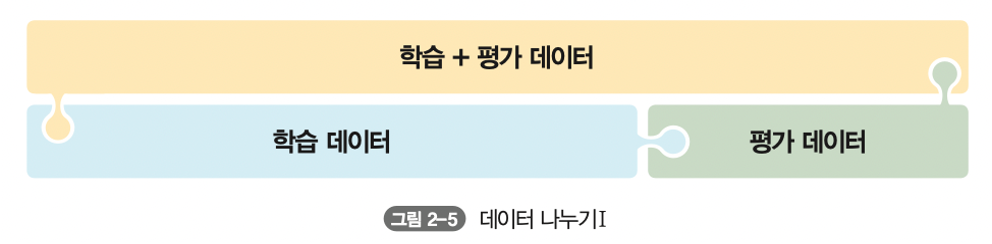
- 파이선 라이브러리인 사이킷런(sklearn)에서 제공하는 기능인 train_test_split를 사용하자
- Train_test_split : 데이터를 원하는 비율로 나누어주는 기능


In [12]:
#학습 데이터 70%, 테스트 데이터 30%로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

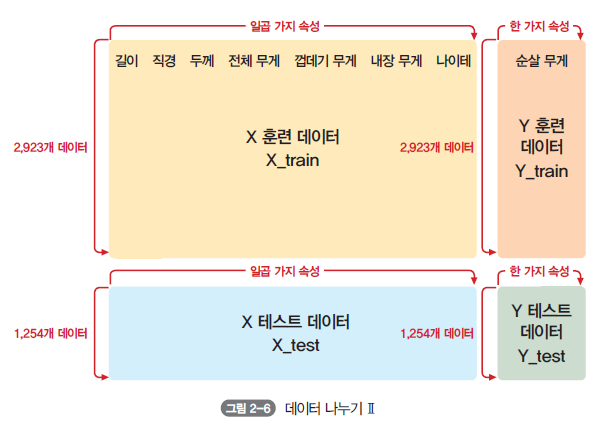

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape가 잘 나누어졌는지 확인해보자


In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2923, 7), (1254, 7), (2923,), (1254,))

# 4) 기계학습 - 지도학습 - 선형회귀(회귀)

- 앞서 7:3으로 나눈 데이터를 가지고 선형 회귀 알고리즘으로 학습시키자
- 선형 회귀 모듈(LinearRegression)을 불러와 변수(lin_reg) 안에 알고리즘 저장
- 절편이 있는 선 사용을 위해 fit_intercept를 True로 설정

In [14]:
#기계학습-지도학습-회귀 인공지능 모델
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True)


알고리즘에 학습 데이터를 각각 넣고 학습(=fit) 시켜 model에 저장


In [15]:
#모델 학습
model = lin_reg.fit(X_train, Y_train)

- 이제 정확도를 확인해보자
- Model.score()함수 : 머신러닝 모델의 정확도를 0~1사이로 표현해주는 R^2 출력
- R^2 (R Squared, 결정계수) : 0과 1 사이로 예측 정확도를 표현한 회귀 평가지표 중 하나로 1에 가까울수록 성능이 우수
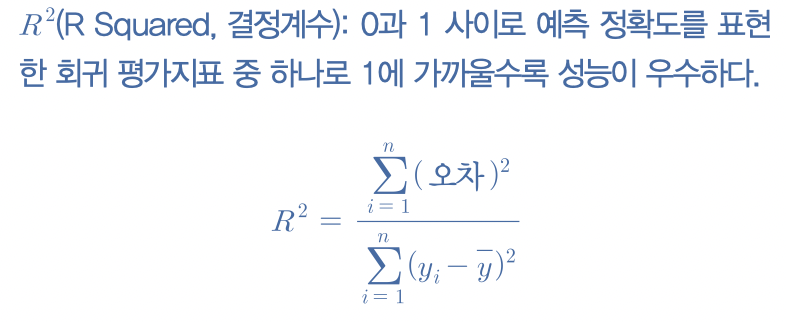

In [16]:
#정확도 확인
print("정확도(R^2) =", model.score(X_train, Y_train) )

정확도(R^2) = 0.9683422099452302


# 5) 가중치와 편향 확인
- y=wx+b에서 기울기w를 가중치(Weight), 절편b을 편향(Bias)라고 부름
- coef_ : 가중치 확인, intercept_ : 편향 확인
- 7가지 독립 변수에 대한 가중치와 편향이 나옴
- 각 가중치에 변수를 곱하고 편향을 합하면 전복 순살 무게가 나옴

In [17]:
#가중치와 편향 확인
w = model.coef_
b = model.intercept_
print(w)
print(b)

[ 0.13216544  0.07453926  0.03037804  0.69165655 -0.41884668 -0.68525444
 -0.00646454]
-0.014075705572578923


     전복을 사서 7가지 속성의 변수를 측정한다면 순살 무게를 평균 96.8%의 정확도로 예측


# 6)머신러닝 모델 테스트
- 실제로 얼마나 잘 예측하는지 테스트 해보자
- 70% 학습 데이터로 이미 학습했고, 남은 30% 평가 데이터로 predict 함수에 넣어 테스트 하자


---


- Y_prediction : 모델에 평가 데이터를 넣어 나온 예측 무게
- Y_test[i] : 실제 순살 무게
- Flatten() : Y_prediction의 결과가 2차원 배열이기에 1차원 배열로 바꿔주는 역할


In [19]:
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제 순살무게: {:.3f}, 학습 후 예측 순살무게: {:.3f}, 차이: {:.3f}".format(label, prediction, label-prediction))

실제 순살무게: 0.278, 학습 후 예측 순살무게: 0.314, 차이: -0.037
실제 순살무게: 0.261, 학습 후 예측 순살무게: 0.267, 차이: -0.006
실제 순살무게: 0.527, 학습 후 예측 순살무게: 0.531, 차이: -0.004
실제 순살무게: 0.021, 학습 후 예측 순살무게: 0.016, 차이: 0.006
실제 순살무게: 0.673, 학습 후 예측 순살무게: 0.665, 차이: 0.009
실제 순살무게: 0.478, 학습 후 예측 순살무게: 0.492, 차이: -0.013
실제 순살무게: 0.267, 학습 후 예측 순살무게: 0.257, 차이: 0.010
실제 순살무게: 0.250, 학습 후 예측 순살무게: 0.290, 차이: -0.040
실제 순살무게: 0.127, 학습 후 예측 순살무게: 0.140, 차이: -0.013
실제 순살무게: 0.461, 학습 후 예측 순살무게: 0.508, 차이: -0.047


##**딥러닝**

# 1)딥러닝 준비
- 머신러닝 : 주로 sklearn 사용
- 딥러닝 : 주로 keras, tensorflow 사용

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

seed : 0 이 아닌 정수로 고정해 준다

In [20]:
tf.random.set_seed(3)


- 총 3개층 구성(입력1,은닉1,출력1) 및 28, 7, 1개는 퍼셉트론 개수
- 층을 몇 개로 하고, 층 안에 퍼셉트론을 몇 개로 하는지에 정답은 없음 -> 감으로 익혀야 함
- 활성화 함수는 출력층을 제외하고 모두 'relu'
---
- Sequential() : 딥러닝 모델 층을 만듦
- .add() : 몇 층을 만들 것인지 설정
- Dense() : 만든 층의 세부 설정
- Input_dim=7 : 입력층을 설정할 때만 데이터 속성의 개수가 몇 개인지 넣음




In [21]:
model = Sequential()
model.add(Dense(28, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1))

# 2)딥러닝 모델 시각화

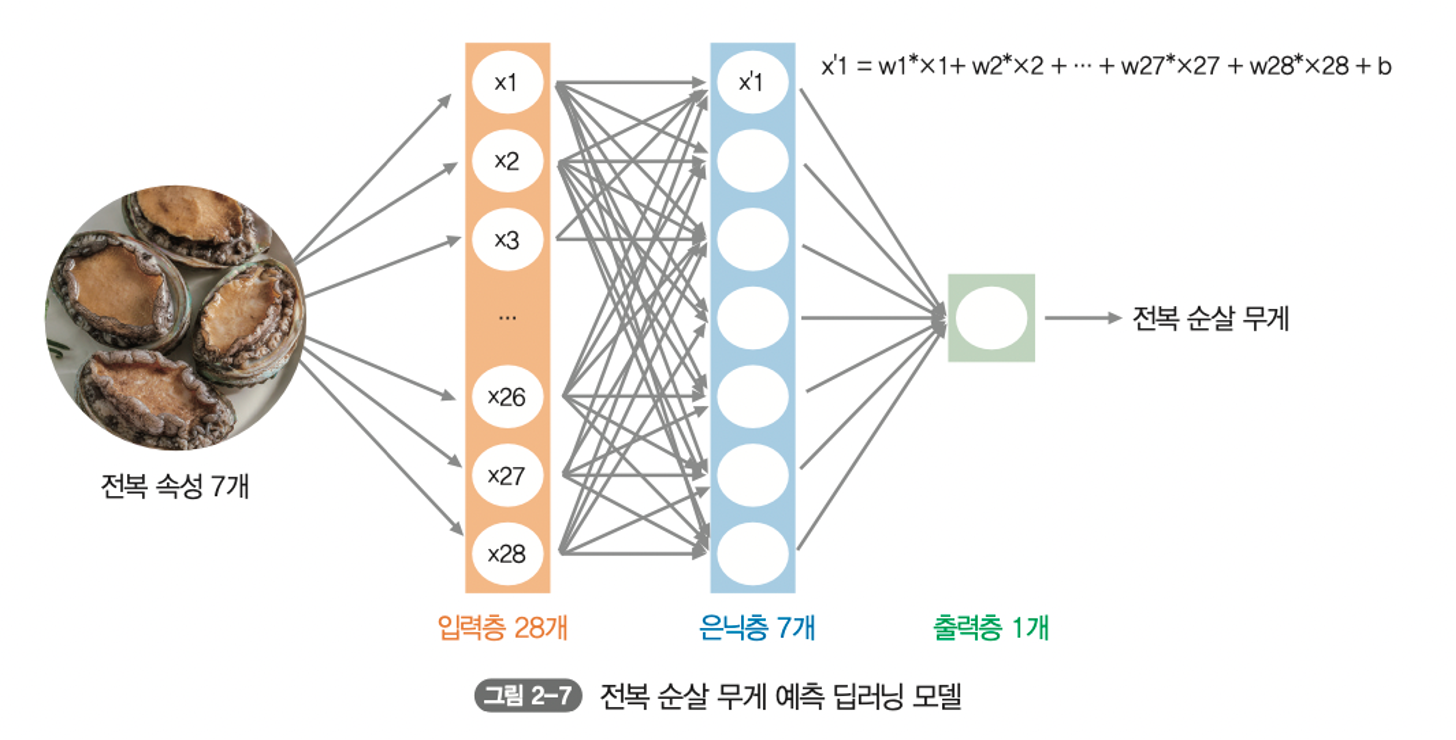

# 3)딥러닝 모델 컴파일
- 오차는 최소제곱법(mean_squared_error)으로 구함
- 일반적으로 많이 쓰는 경사하강법 'adam’으로 최적화(optimizer)하고
- 모델의 performance를 확인하기 위해 정확도(accuracy)를 체크


In [22]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 4)딥러닝 모델 학습
- 컴파일 이후 데이터(X_train, Y_train)를 학습시킴
- 딥러닝 모델은 많이 학습할수록 좋은 것만은 아님
- 대부분 데이터가 일정 수준 이상 학습이 이뤄지면 오차가 비슷해짐
- 더 이상 학습을 하더라도 오차가 줄지 않고, 학습 데이터에만 너무 최적화 되어 다른 데이터 예측 때 정확도가 떨어지는 경우가 있음.   이를 ‘과적합’이라고 함
- 따라서 여러 번 실행 후 적당한 학습 횟수를 찾는 것이 중요
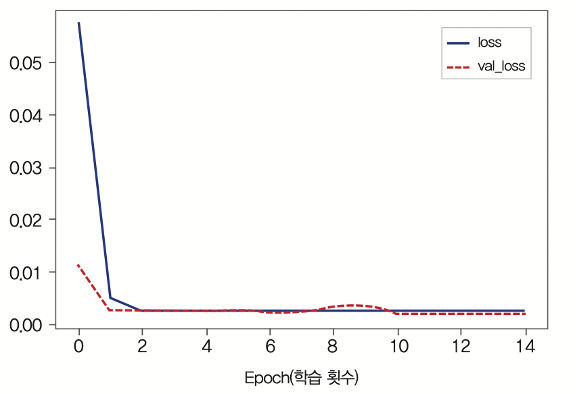
---
- epochs : 학습 횟수
- batch_size : 데이터 소그룹
- validation_split : 검증 데이터 비율 설정





In [23]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=10, validation_split=0.25)

Epoch 1/15
220/220 [==============================] - 2s 5ms/step - loss: 0.0099 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 2/15
220/220 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 3/15
220/220 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 4/15
220/220 [==============================] - 1s 3ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 5/15
220/220 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 6/15
220/220 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 7/15
220/220 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.0000e

      결과 : 평균제곱오차(loss)가 2.3g이고 검증 데이터 평균제곱오차(val_loss)는 2g 으로 매우 높은 정확도를 보여줌


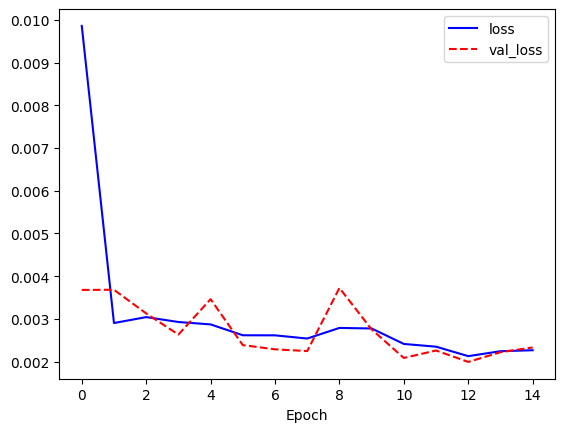

In [24]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 5)딥러닝 모델 실행 결과
- 딥러닝 모델도 실제 순살 무게와 예측 순살 무게를 비교할 수 있음
- .evaluate() 함수에 새로운 데이터인 평가 데이터를 넣어 예측했을 때 오차 확인할 수 있음


In [25]:
model.evaluate(X_test, Y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.0000e+00


[0.0022608821745961905, 0.0]

     결과 : 2g 정도로 아주 낮은 오차가 나옴

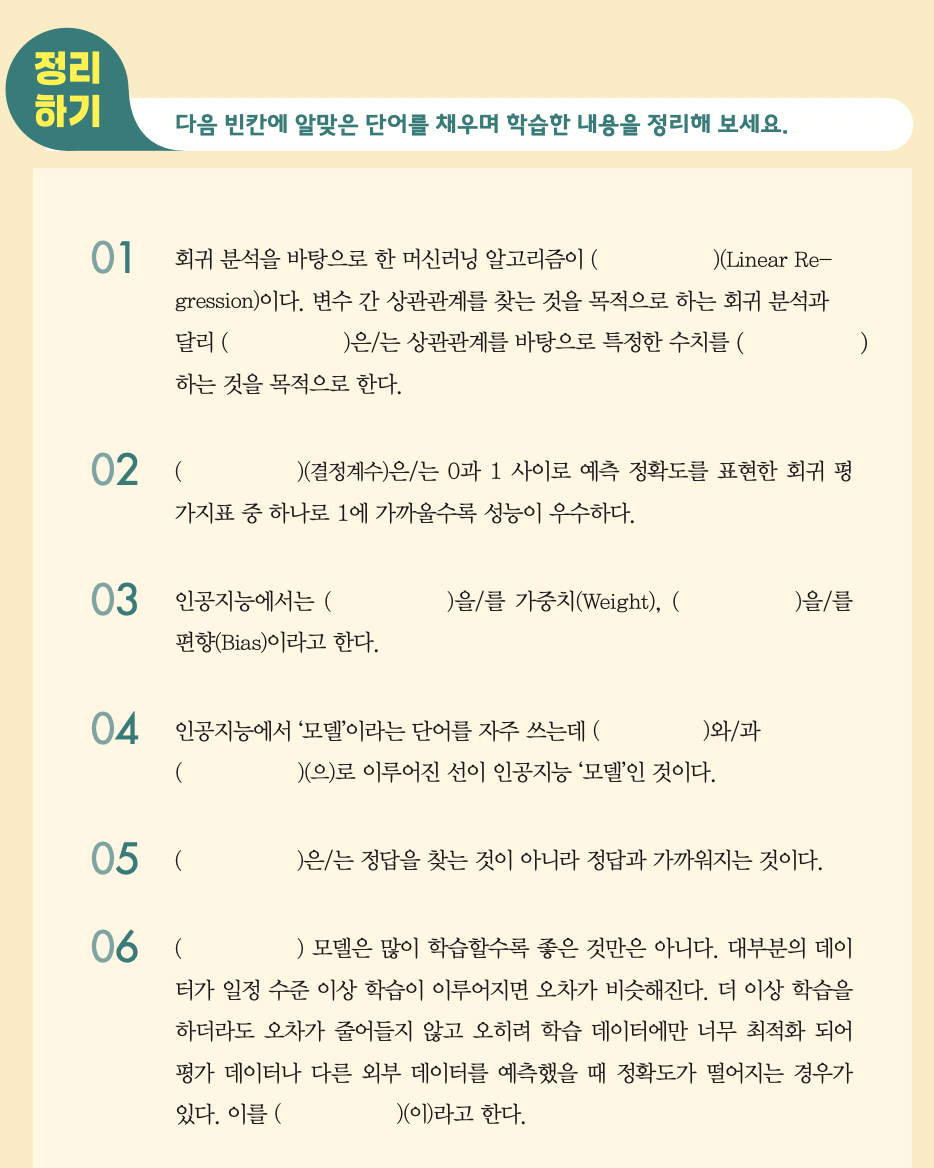